# Problem Statement- Create a linear regression model for the Prediction of Factor Imapcting Bike sharing market 

### Steps Involved:
    1). Reading and Understanding the Data
    2). Visualising the Data
    3). Data Preparation
    4). Splitting the Data into Training and Testing Sets
    5). Building a linear model
    6). Residual Analysis of the train data
    7). Making Predictions Using the Final Model
    8). Model Evaluation


## Step 1: Reading and Understanding the Data

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

In [609]:
# Import file
Day = pd.read_csv('day.csv')
Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [610]:
Day.shape

(730, 16)

### Data Quality Check and cleaning the data

In [611]:
# Is there a missing values
# 1
Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [612]:
# Is there any missing values
# 2
Day.isnull().values.any()

False

#### Duplicate check

In [613]:
day_dup = Day.copy()

# Checking for duplicates and dropping the entire duplicate row if any
day_dup.drop_duplicates(subset=None, inplace=True)

In [614]:
Day.shape

(730, 16)

In [615]:
day_dup.shape


(730, 16)

###### Finding : There is no missing values  and duplicate values in Day Dataframe. But some columns are categorical in nature but stored as float or integer, so we need to change them to categorical. 

In [616]:
Day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Droping Irrevelant coloumns
    1) Drop instant as this is a index variable so it does not contribute to model 
    2) Drop dteday as already month,year and days are present
    3) Drop Casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.


In [617]:
Day.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [618]:
#keeping the old data frame as it will be needed for future analysis
Day_new=Day[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [619]:
Day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [620]:
#Renaming some column names for better understanding of data
Day_new.rename(columns = {'yr':'year','mnth':'month', 'weathersit':'weather', 'atemp':'realfeeltemp', 'hum':'humidity','cnt':'count'}, inplace = True) 
Day_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Drevied Columns
    Season : season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
    Month : 1:January, 2:February, 3:March..........,12:December
    Weather :
        1: Clear, Few clouds, Partly cloudy, Partly cloudy = Clear
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Mist + Cloudy
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Light Snow
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Heavy Rain + Ice Pallets
    Weekday : 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, and 6:Saturday

In [621]:
# To convert Season and Weathersit values into categorical string values to undrstand the data correctly.
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Day_new[['season']] = Day_new[['season']].apply(season_map)
Day_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [622]:
def weathersit_map(y):
    return y.map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow', 4:'Heavy Rain'})
Day_new[['weather']] = Day_new[['weather']].apply(weathersit_map)
Day_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,1,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [623]:
Day_new['month'] = Day_new.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 
                                      12:'Dec'})
Day_new['weekday'] = Day_new.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
Day_new.head()


,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [624]:

Day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    object 
 1   year          730 non-null    int64  
 2   month         730 non-null    object 
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    object 
 5   workingday    730 non-null    int64  
 6   weather       730 non-null    object 
 7   temp          730 non-null    float64
 8   realfeeltemp  730 non-null    float64
 9   humidity      730 non-null    float64
 10  windspeed     730 non-null    float64
 11  count         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Checking Outliers for outliers treatment

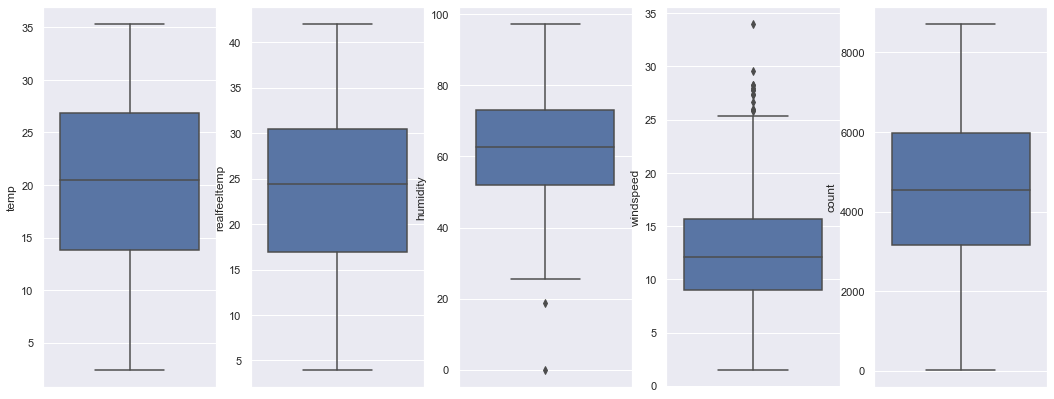

In [625]:
# Analysing Categorical variable to see Sharing demand through box plot

plt.figure(figsize=(18, 7))
plt.subplot(1,5,1)
sns.boxplot(  y = 'temp', data = Day_new)
plt.subplot(1,5,2)
sns.boxplot( y = 'realfeeltemp', data = Day_new)
plt.subplot(1,5,3)
sns.boxplot(y = 'humidity', data = Day_new)
plt.subplot(1,5,4)
sns.boxplot(y = 'windspeed', data = Day_new)
plt.subplot(1,5,5)
sns.boxplot(y = 'count', data = Day_new)

plt.show()

### As we can see windspeed has outliers, we need to handle these outliers

In [626]:
# checking  mean, median and quartile data for windspeed column
Day_new.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [627]:
# Getting the lower and upper bound using IQR method.
# IQR = Interquartile Range (q3-q1)

q1 = Day_new.windspeed.describe()["25%"]
q3 = Day_new.windspeed.describe()["75%"]
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [628]:
# Treatment of outliers
#Capping
Day_new.windspeed=np.where(Day_new.windspeed>upper_bound,upper_bound,Day_new.windspeed)

#Flooring
Day_new.windspeed=np.where(Day_new.windspeed<lower_bound,lower_bound,Day_new.windspeed)

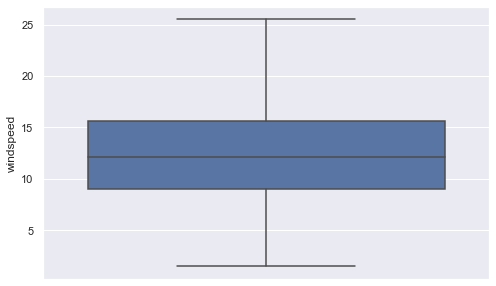

In [629]:
# plotting box plot after handling outliers.
sns.boxplot(y='windspeed', data=Day_new)
plt.show()

## Step 2: Visualising the Data

Target is Column Count

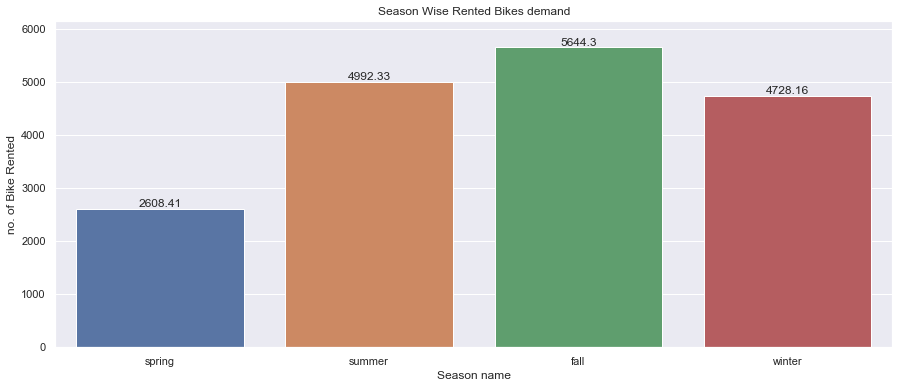

In [630]:
# Visualising season wise effect on rented bikes demand

plt.figure(figsize=(15,6))

ax = sns.barplot(x='season', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Season Wise Rented Bikes demand')
plt.xlabel('Season name')
plt.ylabel('no. of Bike Rented')



plt.show()

### Findings : 
    1.) Fall Season have Highest demand among all season followed by Summer and Winter Season
    2.) Spring Season have least demand, we can say that in spring season least people using rented bike.

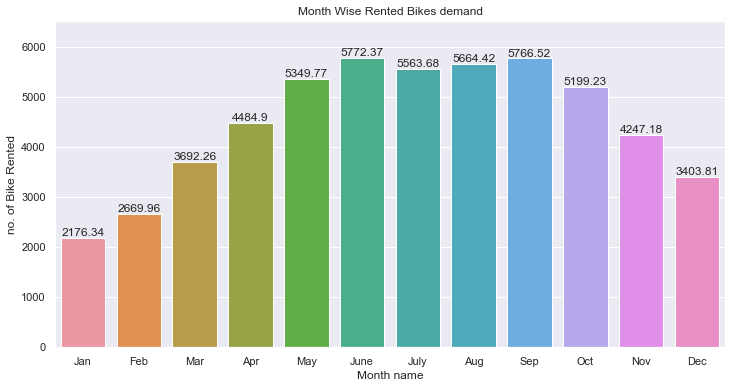

In [631]:
#  Visualising month wise effect on rented bikes demand
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Month Wise Rented Bikes demand')
plt.xlabel('Month name')
plt.ylabel('no. of Bike Rented')
plt.show()

### Findings : 
    1.) June to september has similar demand, Bike rent supply should be according to the demand
    2.) They Should be prepare for bike rent supply according to demand.
    3.) December, February, January have the least demand may be due to Winter season.

Text(0, 0.5, 'no. of Bike Rented')

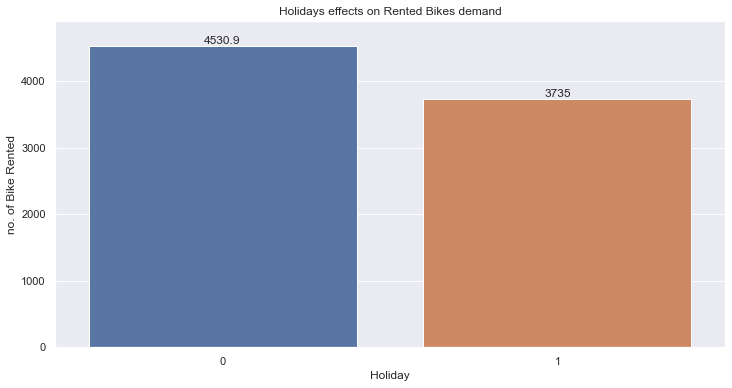

In [632]:
# Visualising holidays effect on rented bikes demand

plt.figure(figsize=(12,6))
ax = sns.barplot(x='holiday', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Holidays effects on Rented Bikes demand')
plt.xlabel('Holiday')
plt.ylabel('no. of Bike Rented')

### Findings : -
    1.) Demand Decreases as on Holidays , it may be due to people Spending there holiday with family.

Text(0, 0.5, 'no. of Bike Rented')

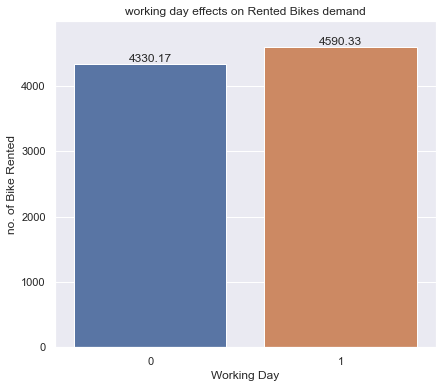

In [633]:
# Visualising workingday wise effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='workingday', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('working day effects on Rented Bikes demand')
plt.xlabel('Working Day')
plt.ylabel('no. of Bike Rented')


### Findings :-
   1.) Looks like similar demand during working day and non working day, but still working day have little bit higher demand.

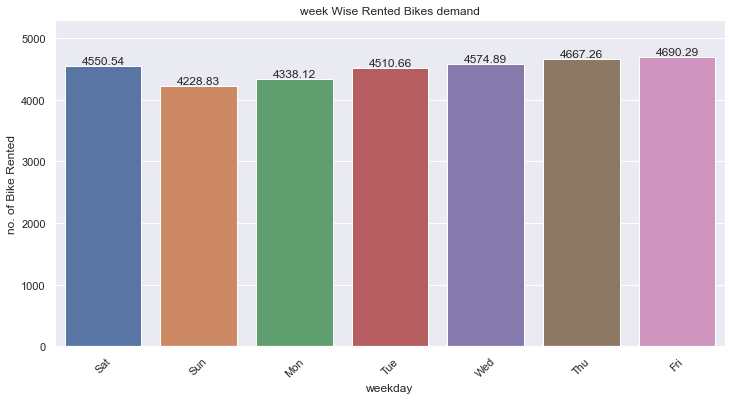

In [634]:
# Visualising Week wise effect on rented bikes demand

plt.figure(figsize=(12,6))
ax = sns.barplot(x='weekday', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('week Wise Rented Bikes demand')
plt.xlabel('weekday')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### Findings :-
    1.) Looks like similar demand during weekday

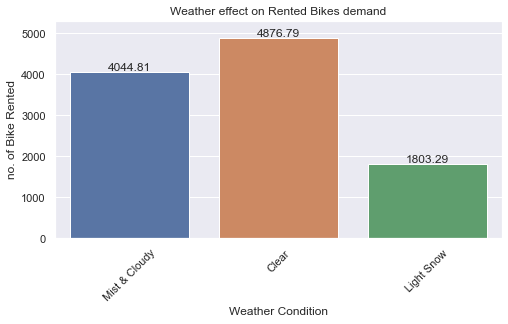

In [635]:
# Visualising weather wise effect on rented bikes demand

plt.figure(figsize=(8,4))
ax = sns.barplot(x='weather', y='count', data=Day_new, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Weather effect on Rented Bikes demand')
plt.xlabel('Weather Condition')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### Findings : -
    1.) It can be observe that if Weather Condition will be Clear, the Deamand will more
    2.) If the Weather Condition will Light Snow Demand will drop


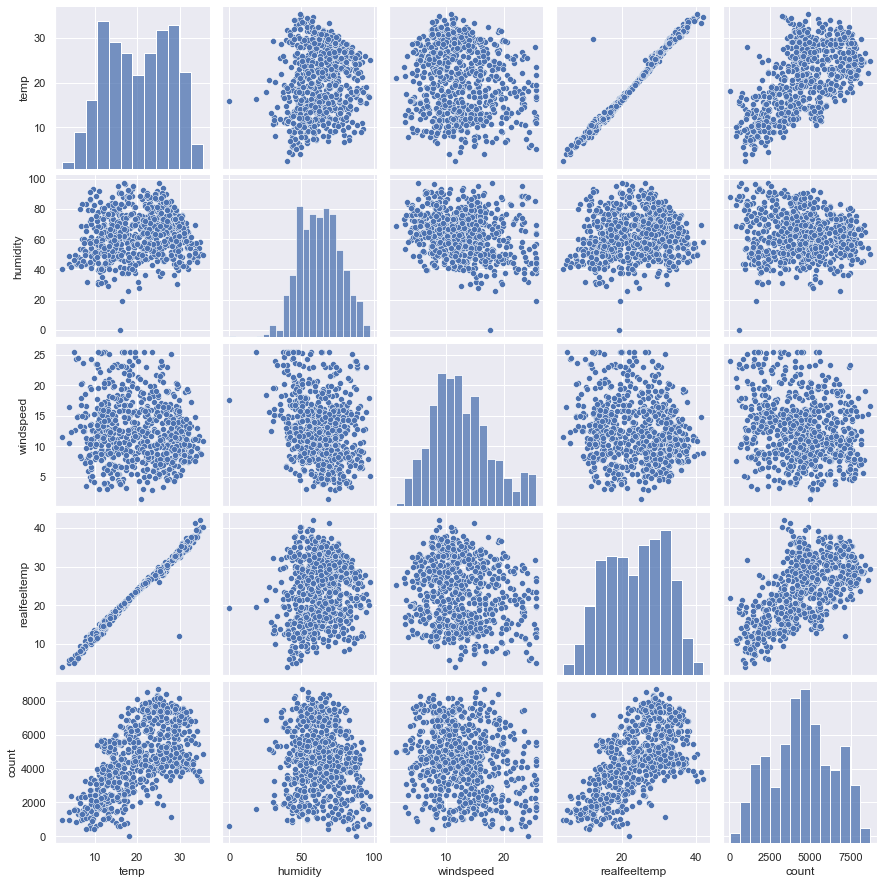

In [636]:
# Visualise pairplot for numerical variables
sns.pairplot(Day_new, vars=["temp", "humidity", "windspeed", "realfeeltemp", "count"])
plt.show()

### Findings : -
    1.) From pair plot we can clearly conclude that there is some linear relation between "temp" , "realfeeltemp" with "count"
    2.) its shows we can go for linear regression for solving the problem. 
#### Independent variable which could be good predictor from EDA :- temp, weather, months, season, and workingday

<Figure size 1440x1080 with 0 Axes>

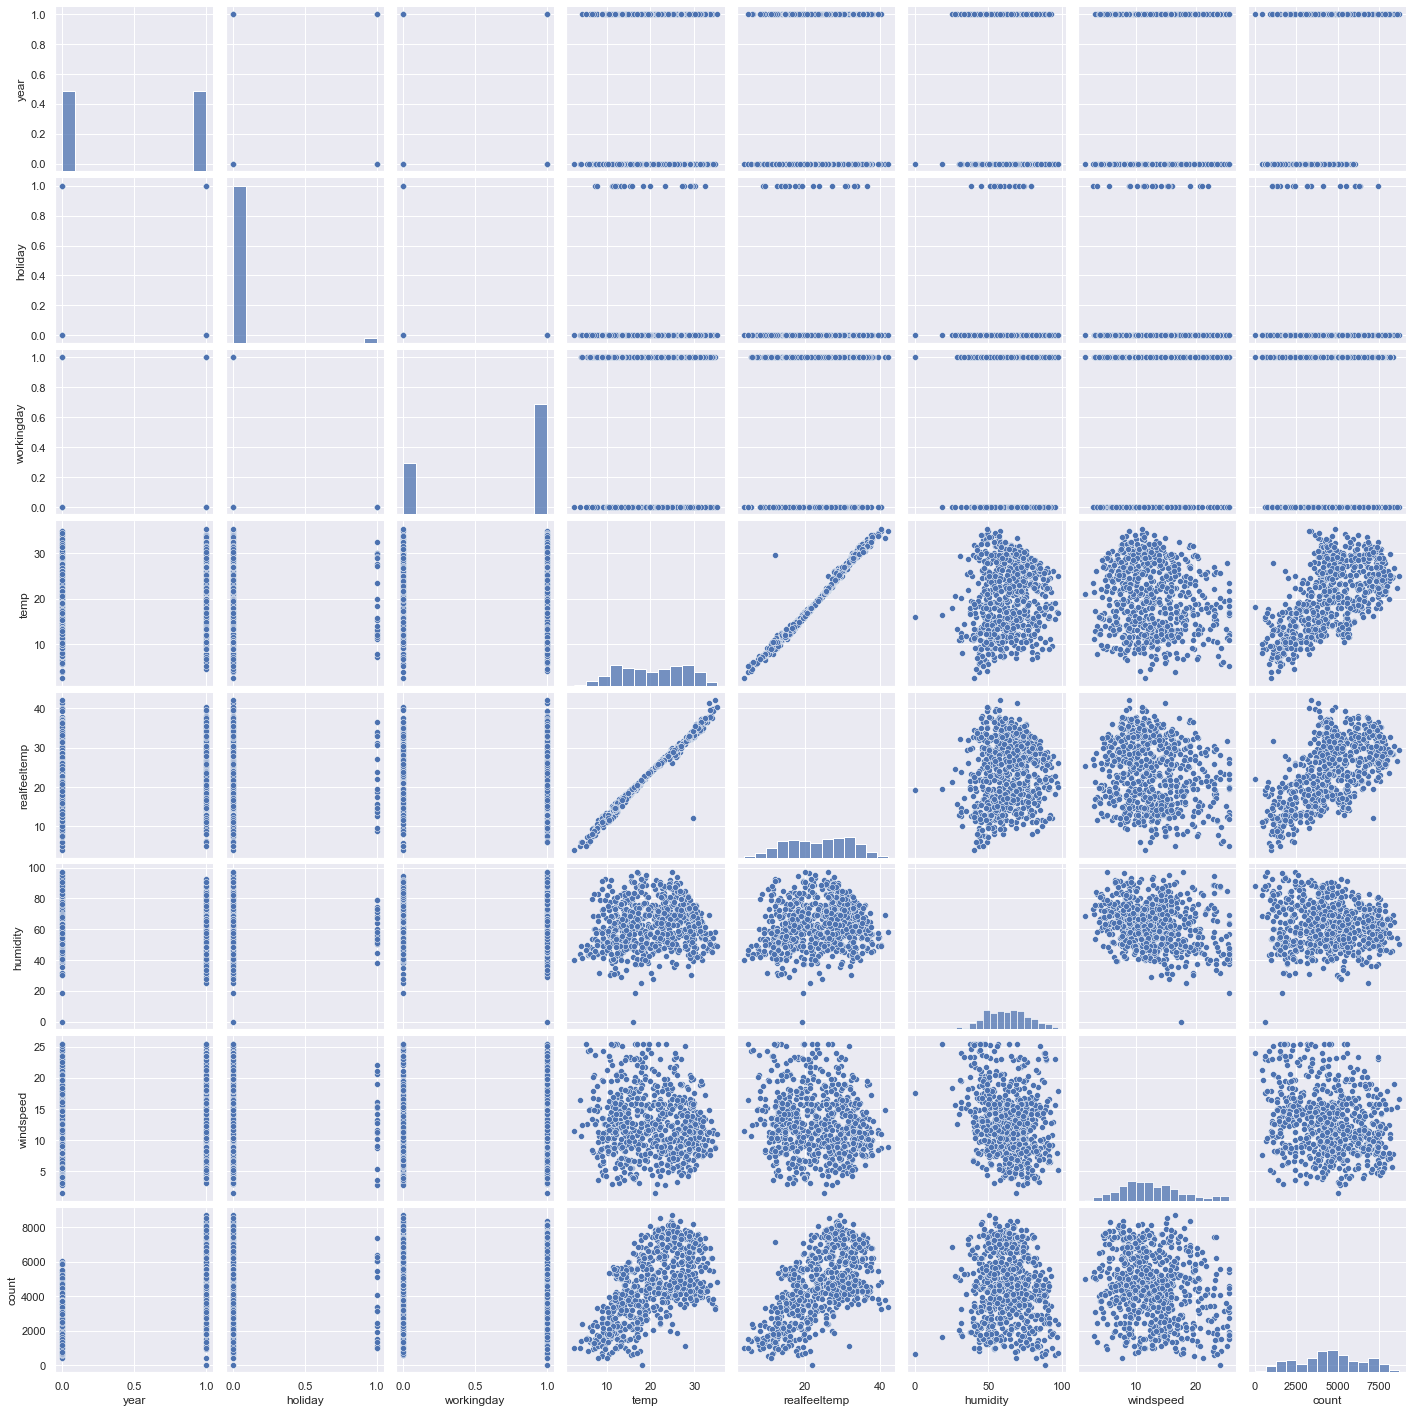

In [637]:
plt.figure(figsize=(20,15))
sns.pairplot(Day_new)
plt.show()

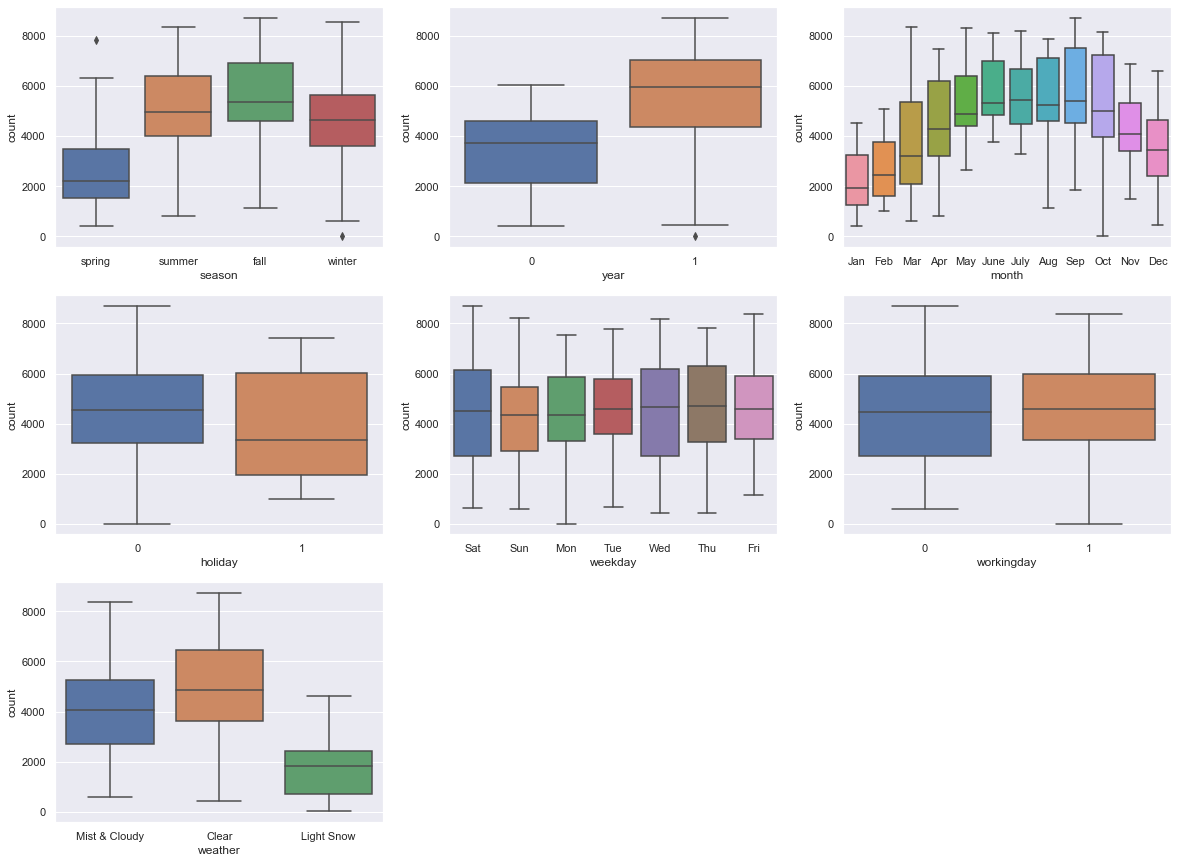

In [638]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = Day_new)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = Day_new)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = Day_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = Day_new)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = Day_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = Day_new)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather', y = 'count', data = Day_new)
plt.show()

### Findings:-
    1.) fall season (season 3) has Highest demand for rental bikes while, spring season has lowest.
    2.) its observed that demand for next year (from 2018 to 2019) has increased.
    3.) Bike Sharing Demand is continuously increasing from january to june, while September month has highest demand among all. after september demand start decreasing.
    4.) whenever there is holiday started demand has been decreased.
    5.) weekday has almost same demand. its not much concluding demand during weekday
    6.) its looks like similar demand during working day and non working day, but still working day have more demand
    7.) During september month Bike sharing demand is more. while during year begning and end its less demand. it could be due to Extreme weather conditions.

### Regression plot For check linearity

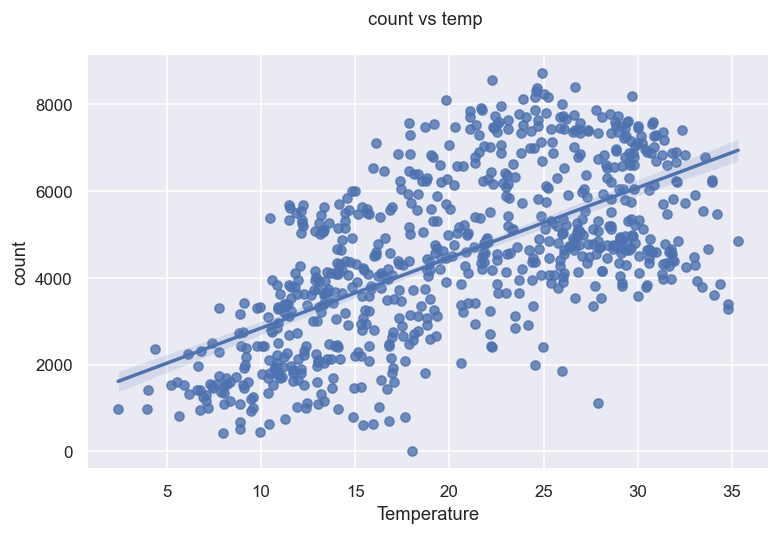

In [639]:
# regression plot count vs temp

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs temp \n")
sns.regplot(y="count", x="temp", data = Day_new)
plt.xlabel("Temperature")
plt.show()

### Findings :
    1.) Demand for bikes is positively correlated with temp.
    2.) Here We can say that count is linearly increasing with temp indicating linear relation.

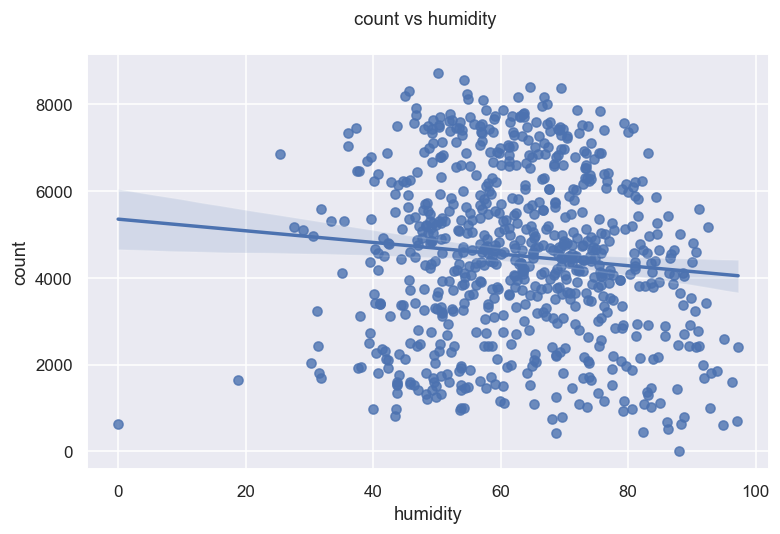

In [640]:
# regression plot count vs humadity

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs humidity \n")
sns.regplot(y="count", x="humidity", data = Day_new)
plt.xlabel("humidity")
plt.show()

#### Findings :
    1.) Here humidity are more scattered around.
    2.) Also count is decreasing with increase in humidity

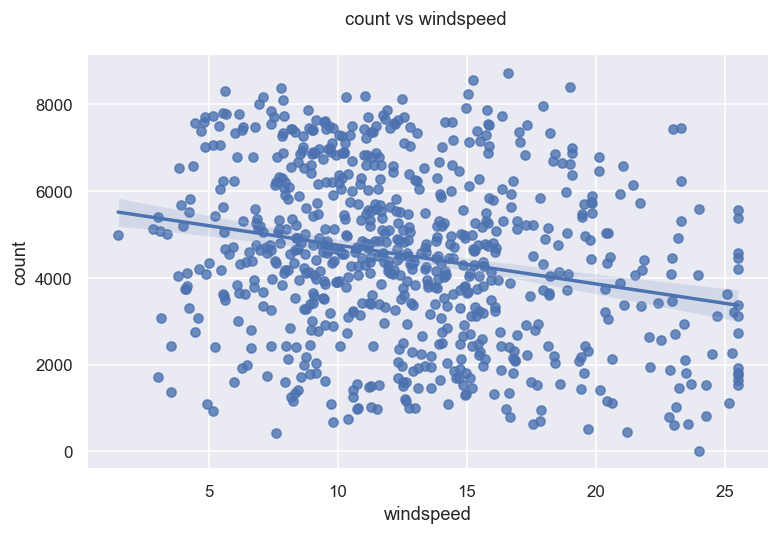

In [641]:
# regression plot count vs windspeed

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs windspeed \n")
sns.regplot(y="count", x="windspeed", data = Day_new)
plt.xlabel("windspeed")
plt.show()

#### Findings :
    1.) Here windspeed are more scattered around.
    2.) Also count is decreasing with increase in windspeed

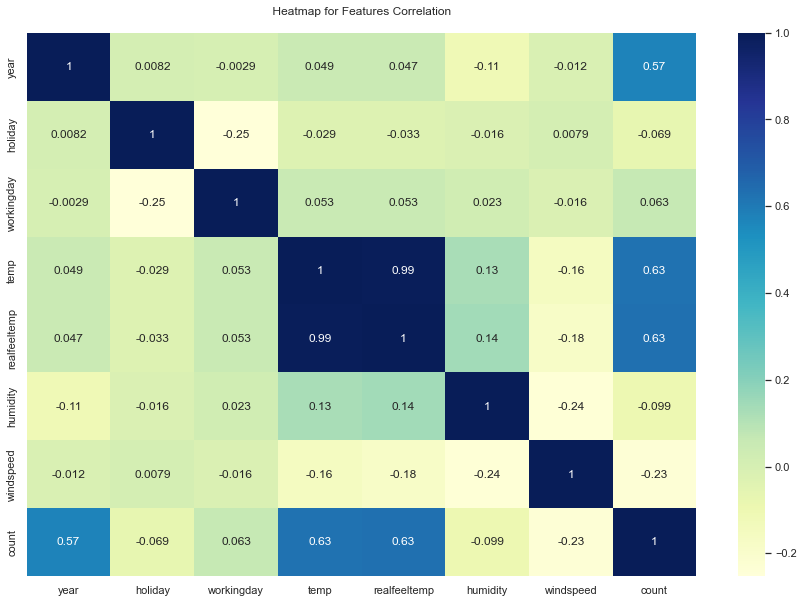

In [642]:
# Heatmap to check correlation between variables

plt.figure(figsize=(15, 10))
sns.heatmap(Day_new.corr(), annot = True, cmap='YlGnBu')
plt.title(" Heatmap for Features Correlation \n")
plt.show()

### Findings:
    1.) temp is highly correlated with realfeeltemp.

In [643]:
#  From Heatmap it's clear that variables 'temp' and 'realfeeltemp' are strongly correlated. Hence dropping column 'realfeeltemp'

Day_new.drop(['realfeeltemp'], axis = 1, inplace = True)
Day_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Data Prepration

In [644]:
# Creating dummy variables for months, weekdays, weathers andseasons

months_dummy = pd.get_dummies(Day_new.month, drop_first = True)
seasons_dummy = pd.get_dummies(Day_new.season, drop_first = True)
weekdays_dummy = pd.get_dummies(Day_new.weekday, drop_first = True)
weathers_dummy = pd.get_dummies(Day_new.weather, drop_first = True)

In [645]:
Day_new = pd.concat([months_dummy, weekdays_dummy, weathers_dummy, seasons_dummy, Day_new], axis = 1)
Day_new.drop(['month', 'season', 'weekday', 'weather'], axis = 1, inplace = True)

In [646]:
Day_new.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [647]:
# checking converted datatypes

Day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   July           730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist & Clo

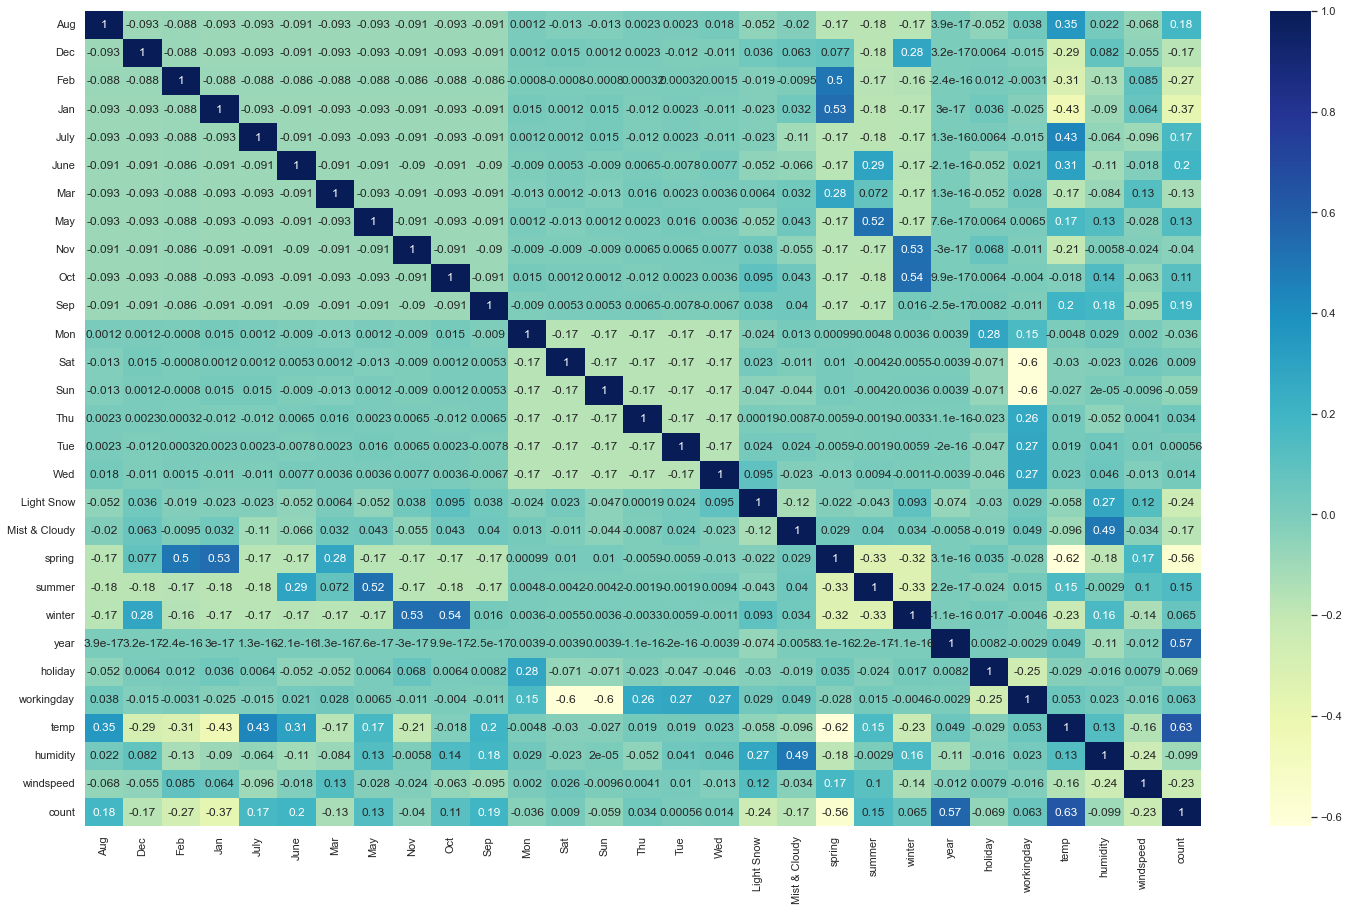

In [648]:
# Heatmap to check correlation between variables

plt.figure(figsize=(25, 15))
sns.heatmap(Day_new.corr(), annot = True, cmap='YlGnBu')
plt.show()

## Step 4: SPLITTING THE DATA
#### 1. Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
#### 2. We will use train_test_split method from sklearn package for this

In [649]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(Day_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [650]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            510 non-null    uint8  
 1   Dec            510 non-null    uint8  
 2   Feb            510 non-null    uint8  
 3   Jan            510 non-null    uint8  
 4   July           510 non-null    uint8  
 5   June           510 non-null    uint8  
 6   Mar            510 non-null    uint8  
 7   May            510 non-null    uint8  
 8   Nov            510 non-null    uint8  
 9   Oct            510 non-null    uint8  
 10  Sep            510 non-null    uint8  
 11  Mon            510 non-null    uint8  
 12  Sat            510 non-null    uint8  
 13  Sun            510 non-null    uint8  
 14  Thu            510 non-null    uint8  
 15  Tue            510 non-null    uint8  
 16  Wed            510 non-null    uint8  
 17  Light Snow     510 non-null    uint8  
 18  Mist & C

In [651]:
df_train.shape

(510, 29)

In [652]:
df_test.shape

(219, 29)

In [653]:
# here for MinMax scaller using sklearn library, library imported in libraries list
# defining a variable scaler for MinMax scalling

scaler = MinMaxScaler()

# Applying scaler() to all the numerical colums in training data
# #creating a list of numeric variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fiting it on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.497426,0.609956,0.263844,0.722734
650,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.416433,0.513852,0.345452,0.815347
212,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.887856,0.572294,0.374972,0.488265
714,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.378013,0.871429,0.218716,0.433042
8,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.098690,0.451083,0.947884,0.092039


In [654]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.540901,0.647390,0.466733,0.515144
std,0.227898,0.149722,0.210535,0.224281
min,0.000000,0.000000,0.000000,0.000000
25%,0.343228,0.536147,0.312501,0.359468
50%,0.540519,0.646367,0.440938,0.516337
75%,0.740406,0.757900,0.588063,0.685861
max,1.000000,1.000000,1.000000,1.000000


## Step 5:  Building a linear model

#### Building Model using RFE and Automated approach
    - Here using RFE model to eliminate some columns

#### Assumptions :-
    - Linear relationship between x and y.
    - Error terms are normally distributed (not x,y).
    - Error terms are independent of each other.
    - Error terms have contant Variance.

In [655]:
# Dividing the tarining dataset into features and target variable

y_train = df_train.pop('count')
X_train = df_train

In [656]:
# Creating a Lienar Regression model using SKLearn for RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [657]:
# using RFE for feature selection , Limiting number of feature selection to 15 features.

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [658]:
# creating list of Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 4),
 ('June', False, 12),
 ('Mar', False, 7),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', False, 3),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [659]:
# listing features which are selected by RFE during selection
X_train.columns[rfe.support_]

Index(['Dec', 'Jan', 'Nov', 'Sep', 'Sat', 'Sun', 'Light Snow', 'spring',
       'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [660]:
# listing features which are not selected by RFE during selection
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'July', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Thu', 'Tue',
       'Wed', 'Mist & Cloudy', 'summer'],
      dtype='object')

## RFE MODEL : 1

In [661]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [662]:
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.head(5)

,const,Dec,Jan,Nov,Sep,Sat,Sun,Light Snow,spring,winter,year,holiday,workingday,temp,humidity,windspeed
483,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0.497426,0.609956,0.263844
650,1.0,0,0,0,0,1,0,0,0,1,1,0,0,0.416433,0.513852,0.345452
212,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.887856,0.572294,0.374972
714,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0.378013,0.871429,0.218716
8,1.0,0,1,0,0,0,1,0,1,0,0,0,0,0.098690,0.451083,0.947884


In [663]:
# Running the linear model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [664]:
#summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          3.34e-179
Time:                        20:39:37   Log-Likelihood:                 488.85
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     495   BIC:                            -884.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.704e+11   1.07e+12     -0.441      0.6

### Findings : -
    - R-squared = 82.9%
    - Adjusted R-squared = 82.4%
    - p value (F stats) close to 0 (significant fit of the model)

In [665]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_curr = X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,workingday,43.04
4,Sat,10.16
5,Sun,9.76
12,temp,2.86
7,spring,2.81
10,holiday,2.55
8,winter,2.24
2,Nov,1.71
1,Jan,1.51
0,Dec,1.34


### Holiday column can be dropped as it have high p value ( 66.0% ) and low VIF

In [666]:
# Dropping holiday
X_train_ver2 = X_train_rfe.drop(["holiday"], axis = 1)

## RFE MODEL : 2

In [667]:
# adding the constant variable
X_train_ver2 = sm.add_constant(X_train_ver2)
# Create and fit a model
lm_ver2 = sm.OLS(y_train, X_train_ver2).fit()
# summary of the model
print(lm_ver2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          2.54e-180
Time:                        20:39:37   Log-Likelihood:                 491.52
No. Observations:                 510   AIC:                            -953.0
Df Residuals:                     495   BIC:                            -889.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3855      0.043      8.922      0.0

In [668]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model

X_train_curr = X_train_ver2
X_train_ver2 = X_train_ver2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,humidity,19.36
10,workingday,17.79
11,temp,14.34
13,windspeed,5.82
4,Sat,4.67
5,Sun,4.51
7,spring,3.13
8,winter,2.75
9,year,2.05
2,Nov,1.82


### Now, all the p values are almost tends to 0 . so, lets remove the feature having highest VIF i.e humidity(vif=19.36)

In [669]:
# Dropping humidity features
X_train_ver3 = X_train_ver2.drop(["humidity"], axis = 1)

## RFE MODEL : 3

In [670]:
# adding the constant variable
X_train_ver3 = sm.add_constant(X_train_ver3)
# Create and fit a model
lm_ver3 = sm.OLS(y_train, X_train_ver3).fit()
# summary of the model
print(lm_ver3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          4.28e-168
Time:                        20:39:37   Log-Likelihood:                 459.71
No. Observations:                 510   AIC:                            -891.4
Df Residuals:                     496   BIC:                            -832.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2192      0.040      5.421      0.0

In [671]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver3
X_train_ver3 = X_train_ver3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,workingday,13.78
11,temp,11.60
12,windspeed,5.79
4,Sat,3.78
5,Sun,3.66
7,spring,3.01
8,winter,2.56
9,year,2.04
2,Nov,1.82
1,Jan,1.60


### workingday has highest VIF value (13.78), dropping this feature and check effect.

In [672]:
# Dropping workingday features
X_train_ver4 = X_train_ver3.drop(["workingday"], axis = 1)

## RFE MODEL : 4

In [673]:
# adding the constant variable
X_train_ver4 = sm.add_constant(X_train_ver4)
# Create and fit a model
lm_ver4 = sm.OLS(y_train, X_train_ver4).fit()
# summary of the model
print(lm_ver4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          9.52e-169
Time:                        20:39:37   Log-Likelihood:                 458.57
No. Observations:                 510   AIC:                            -891.1
Df Residuals:                     497   BIC:                            -836.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2638      0.027      9.709      0.0

In [674]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver4
X_train_ver4 = X_train_ver4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,windspeed,5.03
10,temp,4.26
8,winter,2.29
7,spring,2.26
9,year,2.04
2,Nov,1.80
1,Jan,1.59
0,Dec,1.37
4,Sat,1.21
5,Sun,1.20


### As Sat has highest P vlaue we can try removing that and then check if VIF windspeed can reduce

In [675]:
# Dropping sat features
X_train_ver5 = X_train_ver4.drop(["Sat"], axis = 1)

## RFE MODEL : 5

In [676]:
# adding the constant variable
X_train_ver5 = sm.add_constant(X_train_ver5)
# Create and fit a model
lm_ver5 = sm.OLS(y_train, X_train_ver5).fit()
# summary of the model
print(lm_ver5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.40e-169
Time:                        20:39:37   Log-Likelihood:                 457.83
No. Observations:                 510   AIC:                            -891.7
Df Residuals:                     498   BIC:                            -840.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2674      0.027      9.893      0.0

In [677]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver5
X_train_ver5 = X_train_ver5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,windspeed,4.98
9,temp,4.22
7,winter,2.29
6,spring,2.25
8,year,2.04
2,Nov,1.80
1,Jan,1.59
0,Dec,1.37
3,Sep,1.17
4,Sun,1.17


### Jan has higher P value and low VIF we can drop this

In [678]:
# Dropping Jan features
X_train_ver6 = X_train_ver5.drop(["Jan"], axis = 1)

## RFE MODEL: 6

In [679]:
# adding the constant variable
X_train_ver6 = sm.add_constant(X_train_ver6)
# Create and fit a model
lm_ver6 = sm.OLS(y_train, X_train_ver6).fit()
# summary of the model
print(lm_ver6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.88e-169
Time:                        20:39:37   Log-Likelihood:                 454.76
No. Observations:                 510   AIC:                            -887.5
Df Residuals:                     499   BIC:                            -840.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2552      0.027      9.557      0.0

In [680]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver6
X_train_ver6 = X_train_ver6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,windspeed,4.94
8,temp,4.16
6,winter,2.28
7,year,2.04
1,Nov,1.79
5,spring,1.74
0,Dec,1.32
2,Sep,1.17
3,Sun,1.17
4,Light Snow,1.05


### Nov has higher P value and lower VIF we can remove Nov

In [681]:
# Dropping Nov features
X_train_ver7 = X_train_ver6.drop(["Nov"], axis = 1)

## RFE MODEL 7

In [682]:
# adding the constant variable
X_train_ver7 = sm.add_constant(X_train_ver7)
# Create and fit a model
lm_ver7 = sm.OLS(y_train, X_train_ver7).fit()
# summary of the model
print(lm_ver7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          2.57e-169
Time:                        20:39:37   Log-Likelihood:                 451.63
No. Observations:                 510   AIC:                            -883.3
Df Residuals:                     500   BIC:                            -840.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2444      0.026      9.230      0.0

In [683]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver7
X_train_ver7 = X_train_ver7.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,windspeed,4.81
7,temp,4.07
6,year,2.03
4,spring,1.74
5,winter,1.48
0,Dec,1.21
2,Sun,1.17
1,Sep,1.15
3,Light Snow,1.05


In [684]:
y_train_pred = lm_ver7.predict(X_train_curr)

### Here p value for all the features becomes around 0 and VIF for all the feature about to 4 wich is less then 5 which is best for model acceptance.

## Inference :
    - Here VIF for all features is approx to 4 seems to be almost accepted.
    - P value for all the features is almost 0.
    - R-squared : - 80.2% , Adj. R-squared:- 79.8% both are around 80%.
    - Selecting RFE MODEL 7 as final model as it has all the important statistics high (R-square and Adj. R-squared , F-statistic), with no insignificant variables, no multi coliinearty i.e (high VIF) variables (vif less than 5 is acceptable).
    - R-squared and Adj. R-squared values are almost same for this model, which means that there are no additional parameters that can be removed from this model.

## Step 6: Residual Analysis of the train data

### Residual Analysis
    - Model is ready but we have check realiablity and credibility of the model, for this validate the assumptions that made before building the model

### Assumption 1. Normality

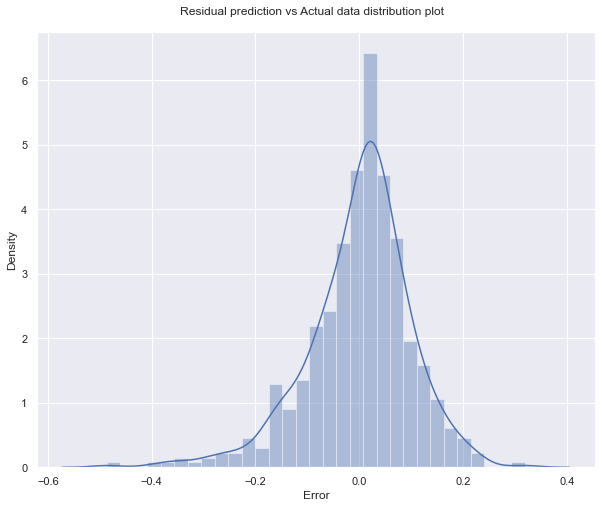

In [685]:
# Plotting a histogram of the error terms
res = y_train - y_train_pred

plt.figure(figsize = (10, 8))
sns.distplot(res)
plt.title('Residual prediction vs Actual data distribution plot  \n')
plt.xlabel('Error')
plt.show()

#### Here we can notice that the error terms are normally distributed and its centered about 0.
    -This model satisfied the assumption of Normal Distribution of Error Terms

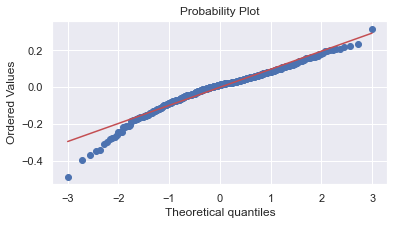

In [686]:
# plotting prob plot and QQ plot

fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

plt.show()

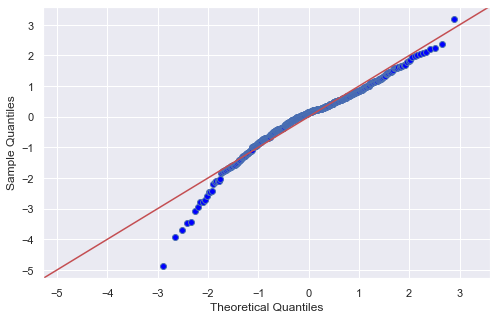

In [687]:
# plotting qq plot

sm.qqplot(res, fit=True, line='45')
plt.show()

### Inference
      - Here we can notice that the error terms are normally distributed.
      - This model satisfied the assumption of Normal Distribution of Error Term

### Assumption 2: Homoscedasticity
    - verifying 2nd assumptions the variance of residual is the same for any value of x or Error Terms are Independent.

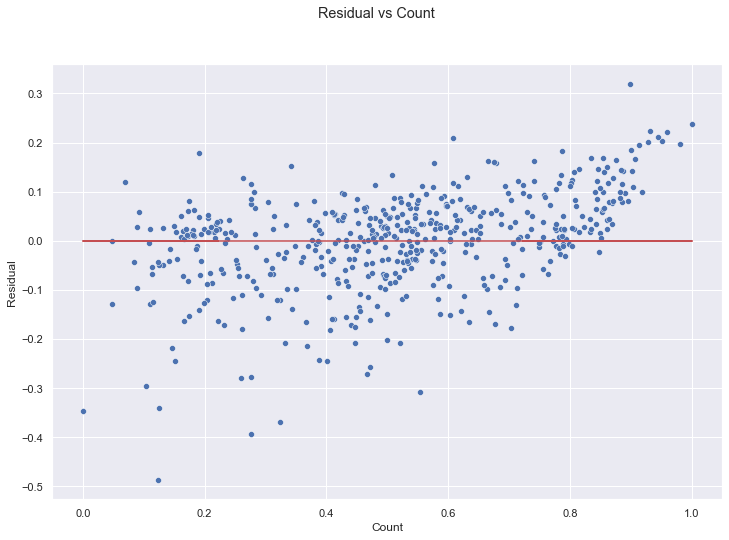

In [688]:
# plotting scatter plot residual vs count 
plt.figure(figsize = (12,8))
sns.scatterplot(y_train, res)
plt.plot(y_train, [0]*len(y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

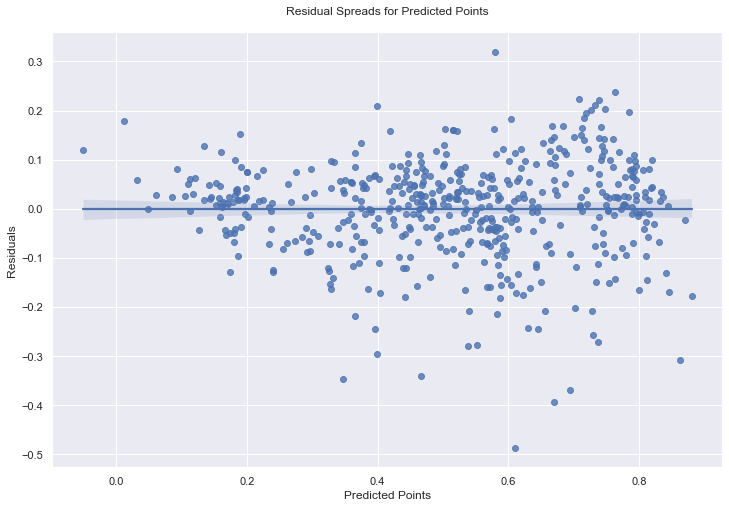

In [689]:
# Checking patterns in residuals spreads for predicted points.
plt.figure(figsize = (12,8))

sns.regplot(y_train_pred, res)
plt.title('Residual Spreads for Predicted Points\n')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

### Inference :
    - Here it can be obeserve from both the scatter plot that a constant deviation from the zero line and hence we can conclude our assumption of Homoscandasticity valid and true.

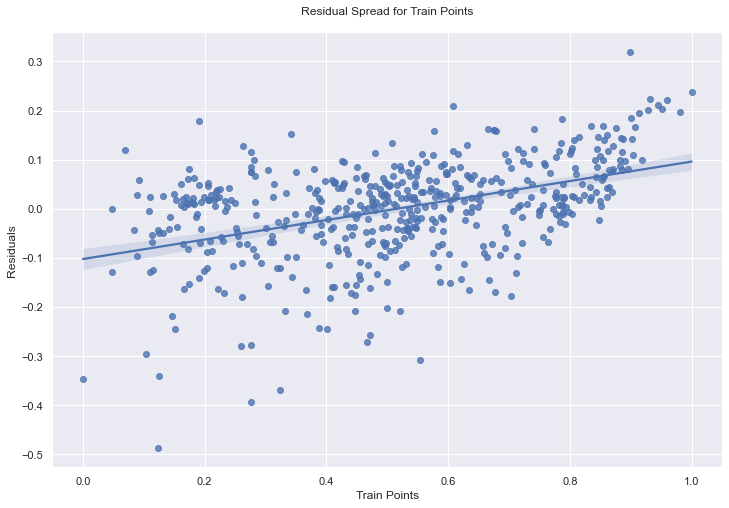

In [690]:
# checking patterns in residuals for Train Points
plt.figure(figsize = (12,8))
sns.regplot(y_train, res)
plt.title('Residual Spread for Train Points\n')
plt.xlabel('Train Points')
plt.ylabel('Residuals')
plt.show()

### Assumption 3: Auto-correlation 

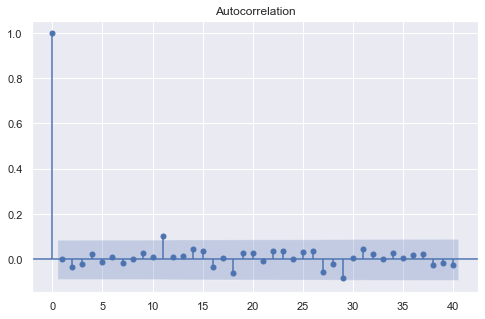

In [691]:
sns.set(rc={'figure.figsize':(8,5)})
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

#### Inference :
    - there are no much error components crossing the confidence interval(greyed out area) and hence we can say that there is no pattern in the error.
    - we can say that No auto-correlation presence. means error term of one observation is not influenced by the error term of another observation
    - hence third assumption of auto correlation has been preserved

## Step 7 :  Making Predictions Using the Final Model

In [692]:
# creating a list of numeric variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fit it on the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
22,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.046591,0.453529,0.625882,0.110907
468,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.543115,0.522511,0.470442,0.855729
553,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.951196,0.596104,0.288189,0.534975
504,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0.699909,0.551083,0.647564,0.817648
353,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.407087,0.618615,0.109369,0.428900


In [693]:
# validating the data to check scalling perfect or not
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.054795,0.105023,0.059361,0.086758,0.100457,0.105023,0.100457,0.068493,0.073059,0.086758,...,0.237443,0.264840,0.251142,0.493151,0.041096,0.684932,0.551225,0.662567,0.468654,0.518889
std,0.228100,0.307285,0.236840,0.282125,0.301297,0.307285,0.301297,0.253169,0.260830,0.282125,...,0.426491,0.442259,0.434663,0.501098,0.198967,0.465607,0.229463,0.143562,0.213853,0.219953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.301299,0.098971,0.055683
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356479,0.553031,0.315081,0.364703
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.557653,0.662338,0.444422,0.525771
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.751309,0.762338,0.589986,0.676887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.010390,1.000000,0.963300


In [694]:
# Dividing the testing dataset into features and target variable
y_test = df_test.pop('count')
X_test = df_test

In [695]:
X_train_ver7.columns

Index(['Dec', 'Sep', 'Sun', 'Light Snow', 'spring', 'winter', 'year', 'temp',
       'windspeed'],
      dtype='object')

In [696]:
X_test_new = X_test[X_train_ver7.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,Dec,Sep,Sun,Light Snow,spring,winter,year,temp,windspeed
22,1.0,0,0,1,0,1,0,0,0.046591,0.625882
468,1.0,0,0,0,0,0,0,1,0.543115,0.470442
553,1.0,0,0,1,0,0,0,1,0.951196,0.288189
504,1.0,0,0,1,0,0,0,1,0.699909,0.647564
353,1.0,1,0,0,0,0,1,0,0.407087,0.109369


In [697]:
# Prediction for testing data
y_test_pred = lm_ver7.predict(X_test_new)

## Step 8 : Model Evaluation

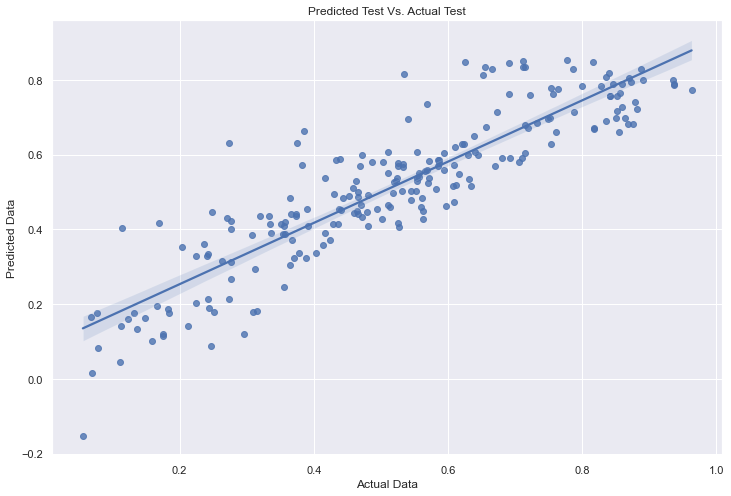

In [698]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize = (12,8))
sns.regplot(y_test, y_test_pred)
plt.title('Predicted Test Vs. Actual Test')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

### Inference : -
    - We can conclude from the above plot that Actual and Predicted test points are linear.

In [699]:
# getting mean square errorvalue
np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred))

0.10069440617344315

In [700]:
#calculating R squared value for test data
r2_score(y_test, y_test_pred)

0.7894582692795213

In [701]:
# Adjusted R^2
# Adj. R^2 = 1-(1-R^2)*(n-1)/(n-p-1))

# where, n = sample size , p = number of independent variables

adj_r2 = 1-((1-0.792431806621049)*(220-1)/(220-10-1))
print(adj_r2)

0.7825003141148791


### Inference :
    - The difference between R squarred of train and test data is less than 5. Hence our model is perfect.

In [702]:
# significant features from final model which predict demands
round(lm_ver7.params,4)

const         0.2444
Dec          -0.0411
Sep           0.0602
Sun          -0.0373
Light Snow   -0.2838
spring       -0.1138
winter        0.0508
year          0.2346
temp          0.4262
windspeed    -0.1085
dtype: float64

## Equation for best fitted line
### count = -0.0411 x Dec + 0.0602 x Sep - 0.0373 x Sun- 0.2838 x Light Snow -0.1138 x spring + 0.0508 x winter + 0.2346 x year + 0.4262 x temp - 0.1085 x windspeed + 0.2444

## Summary and Suggestions:

    - according to the final model (model 7) R-Squared and Adj. R-Squared value on both the train dataset and test dataset, it conclude that the above variables will be definitely explain more than 78% of BoomBikes demand.
    - Coefficients of the variables (coef value ) explains factor effecting the BoomBikes demand.
    - Based on final model (model 7) top three features contributing significantly towards explaining the demand are:
        1. temp 
        2. Weather Situation : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        3. Year 
#### So it is suggested  that BoomBikes Company should give more priority on the above 3 attributes as these have major impact on the Bikes demand.